In [2]:
import pandas as pd
import numpy as np
import gensim
from gensim.models import word2vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib

In [3]:
pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
aiofiles                      23.1.0
aiohttp                       3.8.1
aiosignal                     1.2.0
alabaster                     0.7.12
altair                        4.2.2
anaconda-client               1.9.0
anaconda-navigator            2.2.0
anaconda-project              0.10.2
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astor                         0.8.1
astroid                       2.6.6
astropy                       5.0.4
asttokens                     2.0.5
async-timeout                 4.0.1
atomicwrites                  1.4.0
attrdict                      2.0.1
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.12.1
bac


[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip



Sphinx                        4.4.0
sphinxcontrib-applehelp       1.0.2
sphinxcontrib-devhelp         1.0.2
sphinxcontrib-htmlhelp        2.0.0
sphinxcontrib-jsmath          1.0.1
sphinxcontrib-qthelp          1.0.3
sphinxcontrib-serializinghtml 1.1.5
spyder                        5.1.5
spyder-kernels                2.1.3
SQLAlchemy                    1.4.32
stack-data                    0.2.0
starlette                     0.25.0
statsmodels                   0.13.2
sympy                         1.10.1
tables                        3.6.1
tabulate                      0.8.9
tb-nightly                    2.13.0a20230303
TBB                           0.2
tblib                         1.7.0
tenacity                      8.0.1
tensorboard                   2.12.0
tensorboard-data-server       0.7.0
tensorboard-plugin-wit        1.8.1
terminado                     0.13.1
testpath                      0.5.0
text-unidecode                1.3
textdistance                  4.2.1
thop           

In [4]:
# get the mean vector
file_name = 'data/train_querylist_writefile-1w.csv'
# word2vec_300.model
cur_model = gensim.models.Word2Vec.load('1w_word2vec_300.model')
with open(file_name, 'r', encoding='gbk') as f:
    cur_index = 0
    lines = f.readlines()
    doc_cev = np.zeros((len(lines),300))
    for line in lines:
        word_vec = np.zeros((1,300))
        words = line.strip().split(' ')
        wrod_num = 0
        for word in words:
            vocab = cur_model.wv
            if word in vocab:
                wrod_num += 1
                word_vec += np.array([cur_model.wv[word]])
        doc_cev[cur_index] = word_vec / float(wrod_num)
        cur_index += 1

In [5]:
# The 300-dimensional word vector is reduced to 2 dimensions
file_name = 'data/train_querylist_writefile-1w.csv'
cur_model = gensim.models.Word2Vec.load('1w_word2vec_300.model')
rawWordVec = []
word2ind = {}
for i,w in enumerate(cur_model.wv.index_to_key):
    rawWordVec.append(cur_model.wv[w])
    word2ind[w] = i
rawWordVec = np.array(rawWordVec)
X_reduced = PCA(n_components=2).fit_transform(rawWordVec)


In [6]:
X_reduced

array([[ 0.60194176, -1.1115816 ],
       [ 1.5447985 ,  6.139515  ],
       [ 0.41900697, -0.31996998],
       ...,
       [-0.09818363,  0.10697694],
       [-0.04866031, -0.02742828],
       [ 0.08397365, -0.19432762]], dtype=float32)

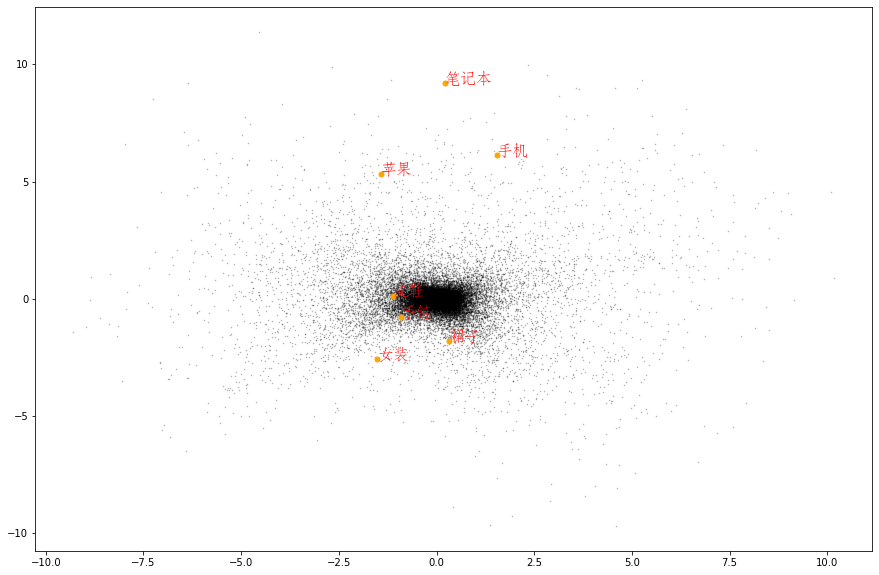

In [38]:
# 2D word vector visualization
# Draw a star map
# Plot the 2D space projection of all word vectors
fig = plt.figure(figsize = (15, 10))
ax = fig.gca()
ax.set_facecolor('white')
ax.plot(X_reduced[:, 0], X_reduced[:, 1], '.', markersize = 1, alpha = 0.3, color = 'black')


# plot vectors of several special words
words = ['苹果', '女装', '笔记本', '手链', '皮鞋', '裙子','手机']

# Set Chinese font, otherwise garbled characters
zhfont1 = matplotlib.font_manager.FontProperties(fname='./华文仿宋.ttf', size=16)
for w in words:
    if w in word2ind:
        ind = word2ind[w]
        xy = X_reduced[ind]
        plt.plot(xy[0], xy[1], '.', alpha =1, color = 'orange',markersize=10)
        plt.text(xy[0], xy[1], w, fontproperties = zhfont1, alpha = 1, color = 'red')

In [7]:
doc_cev.shape

(9988, 300)

In [9]:
# load the gender label
genderlabel = np.loadtxt(open('data/train_gender.csv', 'r')).astype(int)
genderlabel.shape

(9988,)

In [10]:
# load the education label
educationlabel = np.loadtxt(open('data/train_education.csv', 'r')).astype(int)
educationlabel.shape

(9988,)

In [11]:
# load the age label
agelabel = np.loadtxt(open('data/train_age.csv', 'r')).astype(int)
agelabel.shape

(9988,)

In [12]:
# remove the invalid data(zero) in (doc_cev, genderlabel)
def removezero(x, y):
        nozero = np.nonzero(y)
        y = y[nozero]
        x = np.array(x)
        x = x[nozero]
        return x, y
gender_train, genderlabel = removezero(doc_cev, genderlabel)
print (gender_train.shape,genderlabel.shape)

(9756, 300) (9756,)


In [13]:
# remove the invalid data(zero) in (doc_cev, educationlabel)
def removezero(x, y):
        nozero = np.nonzero(y)
        y = y[nozero]
        x = np.array(x)
        x = x[nozero]
        return x, y
education_train, educationlabel = removezero(doc_cev, educationlabel)
print (education_train.shape,educationlabel.shape)
print (educationlabel)

(9064, 300) (9064,)
[4 3 3 ... 5 5 3]


In [14]:
# remove the invalid data(zero) in (doc_cev, agelabel)
def removezero(x, y):
        nozero = np.nonzero(y)
        y = y[nozero]
        x = np.array(x)
        x = x[nozero]
        return x, y
age_train, agelabel = removezero(doc_cev, agelabel)
print (age_train.shape,agelabel.shape)
print (agelabel)

(9815, 300) (9815,)
[1 2 4 ... 1 2 3]


In [15]:
# confusion_matrix
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

0.7968429684296843
Recall metric in the testing dataset:  0.8061325420375866
accuracy metric in the testing dataset:  0.7968429684296843


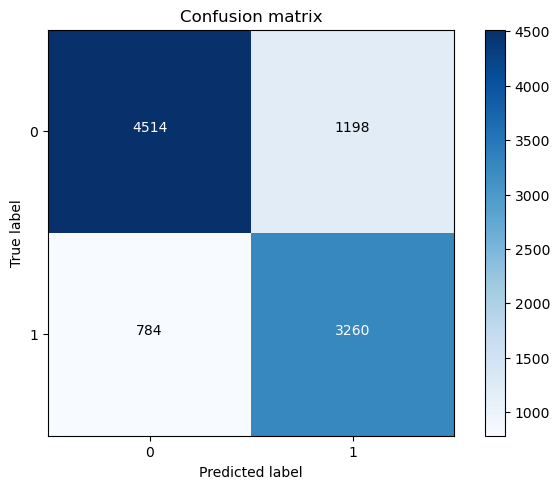

In [22]:
# do the training for LogisticRegression model(label: gender)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

LR_model = LogisticRegression(class_weight='balanced', random_state=0,penalty='l1',solver='liblinear')

LR_model.fit(gender_train,genderlabel)
y_pred = LR_model.predict(gender_train)
print (LR_model.score(gender_train,genderlabel))
cnf_matrix = confusion_matrix(genderlabel,y_pred)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

print("accuracy metric in the testing dataset: ", (cnf_matrix[1,1]+cnf_matrix[0,0])/(cnf_matrix[0,0]+cnf_matrix[1,1]+cnf_matrix[1,0]+cnf_matrix[0,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

0.3242497793468667
Recall metric in the testing dataset:  0.7941176470588235
accuracy metric in the testing dataset:  0.3242497793468667


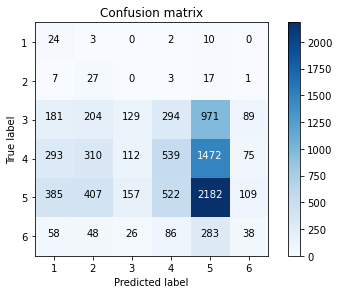

In [47]:
# do the training for LogisticRegression model(label: education)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

LR_model = LogisticRegression(class_weight='balanced', random_state=0,penalty='l1',solver='liblinear')

LR_model.fit(education_train,educationlabel)
y_pred = LR_model.predict(education_train)
print (LR_model.score(education_train,educationlabel))
cnf_matrix = confusion_matrix(educationlabel,y_pred)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

print("accuracy metric in the testing dataset: ", (cnf_matrix[5,5]+cnf_matrix[4,4]+cnf_matrix[3,3]+cnf_matrix[2,2]+cnf_matrix[1,1]+cnf_matrix[0,0])/(cnf_matrix[0,0]+cnf_matrix[0,1]+cnf_matrix[0,2]+cnf_matrix[0,3]+cnf_matrix[0,4]+cnf_matrix[0,5]
                                                                                                                                                     +cnf_matrix[1,0]+cnf_matrix[1,1]+cnf_matrix[1,2]+cnf_matrix[1,3]+cnf_matrix[1,4]+cnf_matrix[1,5]
                                                                                                                                                     +cnf_matrix[2,0]+cnf_matrix[2,1]+cnf_matrix[2,2]+cnf_matrix[2,3]+cnf_matrix[2,4]+cnf_matrix[2,5]
                                                                                                                                                     +cnf_matrix[3,0]+cnf_matrix[3,1]+cnf_matrix[3,2]+cnf_matrix[3,3]+cnf_matrix[3,4]+cnf_matrix[3,5]
                                                                                                                                                     +cnf_matrix[4,0]+cnf_matrix[4,1]+cnf_matrix[4,2]+cnf_matrix[4,3]+cnf_matrix[4,4]+cnf_matrix[4,5]
                                                                                                                                                     +cnf_matrix[5,0]+cnf_matrix[5,1]+cnf_matrix[5,2]+cnf_matrix[5,3]+cnf_matrix[5,4]+cnf_matrix[5,5]))

# Plot non-normalized confusion matrix
class_names = [1,2,3,4,5,6]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

0.40099282956425814
accuracy metric in the testing dataset:  0.40099282956425814


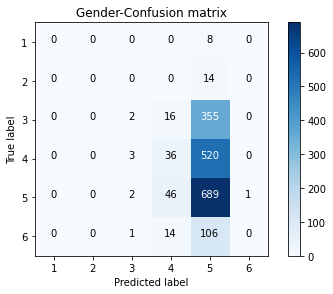

In [48]:
# do the training for RandomForestClassifier model(label: education)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(education_train,educationlabel,test_size = 0.2, random_state = 0)

RF_model = RandomForestClassifier(n_estimators=100,min_samples_split=5,max_depth=10)

RF_model.fit(X_train,y_train)
y_pred = RF_model.predict(X_test)
print (RF_model.score(X_test,y_test))

cnf_matrix = confusion_matrix(y_test,y_pred)

print("accuracy metric in the testing dataset: ", (cnf_matrix[5,5]+cnf_matrix[4,4]+cnf_matrix[3,3]+cnf_matrix[2,2]+cnf_matrix[1,1]+cnf_matrix[0,0])/(cnf_matrix[0,0]+cnf_matrix[0,1]+cnf_matrix[0,2]+cnf_matrix[0,3]+cnf_matrix[0,4]+cnf_matrix[0,5]
                                                                                                                                                     +cnf_matrix[1,0]+cnf_matrix[1,1]+cnf_matrix[1,2]+cnf_matrix[1,3]+cnf_matrix[1,4]+cnf_matrix[1,5]
                                                                                                                                                     +cnf_matrix[2,0]+cnf_matrix[2,1]+cnf_matrix[2,2]+cnf_matrix[2,3]+cnf_matrix[2,4]+cnf_matrix[2,5]
                                                                                                                                                     +cnf_matrix[3,0]+cnf_matrix[3,1]+cnf_matrix[3,2]+cnf_matrix[3,3]+cnf_matrix[3,4]+cnf_matrix[3,5]
                                                                                                                                                     +cnf_matrix[4,0]+cnf_matrix[4,1]+cnf_matrix[4,2]+cnf_matrix[4,3]+cnf_matrix[4,4]+cnf_matrix[4,5]
                                                                                                                                                     +cnf_matrix[5,0]+cnf_matrix[5,1]+cnf_matrix[5,2]+cnf_matrix[5,3]+cnf_matrix[5,4]+cnf_matrix[5,5]))

# Plot non-normalized confusion matrix
class_names = [1,2,3,4,5,6]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Gender-Confusion matrix')
plt.show()

0.48344370860927155
accuracy metric in the testing dataset:  0.48344370860927155


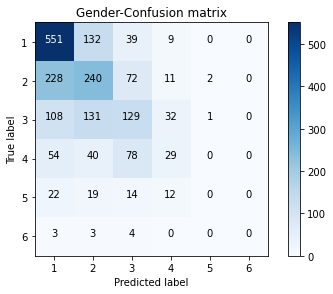

In [52]:
# do the training for KNeighborsClassifier model(label: education)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(age_train,agelabel,test_size = 0.2, random_state = 0)



KNN_model = KNeighborsClassifier(n_neighbors=12)
KNN_model.fit(X_train,y_train)
y_pred = KNN_model.predict(X_test)
print (KNN_model.score(X_test,y_test))

cnf_matrix = confusion_matrix(y_test,y_pred)

#print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

print("accuracy metric in the testing dataset: ", (cnf_matrix[5,5]+cnf_matrix[4,4]+cnf_matrix[3,3]+cnf_matrix[2,2]+cnf_matrix[1,1]+cnf_matrix[0,0])/(cnf_matrix[0,0]+cnf_matrix[0,1]+cnf_matrix[0,2]+cnf_matrix[0,3]+cnf_matrix[0,4]+cnf_matrix[0,5]
                                                                                                                                                     +cnf_matrix[1,0]+cnf_matrix[1,1]+cnf_matrix[1,2]+cnf_matrix[1,3]+cnf_matrix[1,4]+cnf_matrix[1,5]
                                                                                                                                                     +cnf_matrix[2,0]+cnf_matrix[2,1]+cnf_matrix[2,2]+cnf_matrix[2,3]+cnf_matrix[2,4]+cnf_matrix[2,5]
                                                                                                                                                     +cnf_matrix[3,0]+cnf_matrix[3,1]+cnf_matrix[3,2]+cnf_matrix[3,3]+cnf_matrix[3,4]+cnf_matrix[3,5]
                                                                                                                                                     +cnf_matrix[4,0]+cnf_matrix[4,1]+cnf_matrix[4,2]+cnf_matrix[4,3]+cnf_matrix[4,4]+cnf_matrix[4,5]
                                                                                                                                                     +cnf_matrix[5,0]+cnf_matrix[5,1]+cnf_matrix[5,2]+cnf_matrix[5,3]+cnf_matrix[5,4]+cnf_matrix[5,5]))

# Plot non-normalized confusion matrix
class_names = [1,2,3,4,5,6]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Gender-Confusion matrix')
plt.show()

0.5228731533367295
79


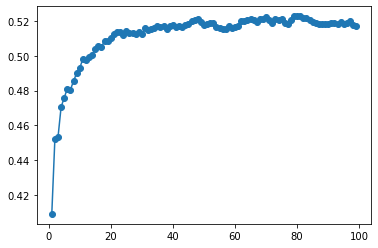

In [29]:
# do the training for KNeighborsClassifier model(label: age)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(age_train,agelabel,test_size = 0.2, random_state = 0)
avg_scores = []
all_scores = []
parameter_values = list(range(1,100))
for n_neighbors in parameter_values:
    estimator = KNeighborsClassifier(n_neighbors=n_neighbors)
    scores = cross_val_score(estimator,age_train,agelabel,scoring='accuracy')
    avg_scores.append(np.mean(scores))
    all_scores.append(scores)

maxNumber = np.max(avg_scores)
print(maxNumber)
for i in parameter_values:
    if (avg_scores[i] == maxNumber).all() :
        print(i)
        break
plt.plot(parameter_values,avg_scores,'-o')
plt.show()


In [33]:
# Word segmentation and part-of-speech filtering for user search data
import pandas as pd
import jieba.analyse
import time
import jieba
import jieba.posseg
import os, sys


def input(trainname):
    traindata = []
    with open(trainname, 'rb') as f:
        line = f.readline()
        count = 0
        while line:
            try:
                traindata.append(line)
                count += 1
            except:
                print ("error:", line, count)
            line=f.readline()
    return traindata

filepath = './data/customer_querylist.csv'
QueryList = input(filepath)

writepath = './data/customer_querylist_writefile-1.csv'
csvfile = open(writepath, 'w')

POS = {}
for i in range(len(QueryList)):
    #print (i)
    if i%2000 == 0 and i >=1000:
        print (i,'finished') 
    s = []
    str = ""
    words = jieba.posseg.cut(QueryList[i])# 带有词性的精确分词模式
    allowPOS = ['n','v','j']
    for word, flag in words:
        POS[flag]=POS.get(flag,0)+1
        if (flag[0] in allowPOS) and len(word)>=2:
            str += word + " "
            
    cur_str = str.encode('utf8')
    cur_str = cur_str.decode('utf8')
    s.append(cur_str)
    
    csvfile.write(" ".join(s)+'\n')
csvfile.close()

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\xiayu\AppData\Local\Temp\jieba.cache
Loading model cost 1.068 seconds.
Prefix dict has been built successfully.


In [39]:
# transform the search data into word vector
from gensim.models import word2vec
train_path = './data/customer_querylist_writefile-1.csv'
with open(train_path, 'r') as f:
    My_list = []
    lines = f.readlines()
    for line in lines:
        cur_list = []
        line = line.strip()
        data = line.split(" ")
        for d in data:
            cur_list.append(d)
        My_list.append(cur_list)
    
    model = word2vec.Word2Vec(My_list, vector_size=300, window=10,workers=4)  
    savepath = '1_word2vec_' + '300'+'.model' # model
    
    model.save(savepath)

In [47]:
# get the mean vector
file_name = 'data/customer_querylist_writefile-1.csv'
# word2vec_300.model
cur_model = gensim.models.Word2Vec.load('1_word2vec_300.model')
with open(file_name, 'r', encoding='utf-8') as f:
    cur_index = 0
    lines = f.readlines()
    doc_cev_customer = np.zeros((len(lines),300))
    for line in lines:
        word_vec = np.zeros((1,300))
        words = line.strip().split(' ')
        wrod_num = 0
        for word in words:
            vocab = cur_model.wv
            if word in vocab:
                wrod_num += 1
                word_vec += np.array([cur_model.wv[word]])
        doc_cev_customer[cur_index] = word_vec / float(wrod_num)
        cur_index += 1

In [48]:
doc_cev_customer.shape

(1, 300)

In [55]:
# do the prediction for LogisticRegression model(label: gender)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

LR_model = LogisticRegression(class_weight='balanced', random_state=0,penalty='l1',solver='liblinear')

LR_model.fit(gender_train,genderlabel)
y_pred = LR_model.predict(doc_cev_customer)
if y_pred == 1:
    print ("Woman")
else: 
     print ("Man")

Woman


In [54]:
# do the prediction for RandomForestClassifier model(label: education)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(education_train,educationlabel,test_size = 0.2, random_state = 0)

RF_model = RandomForestClassifier(n_estimators=100,min_samples_split=5,max_depth=10)

RF_model.fit(X_train,y_train)
y_pred = RF_model.predict(doc_cev_customer)
if y_pred == 1:
    print ("5-10")
elif y_pred == 2:
    print ("10-15")
elif y_pred == 3:
    print ("15-20")
elif y_pred == 4:
    print ("20-25 ")
elif y_pred == 5:
    print ("25-30")
else:
    print ("30-35")

20-25 


In [53]:
# do the prediction for KNeighborsClassifier model(label: education)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(age_train,agelabel,test_size = 0.2, random_state = 0)

KNN_model = KNeighborsClassifier(n_neighbors=79)
KNN_model.fit(X_train,y_train)
y_pred = KNN_model.predict(doc_cev_customer)
if y_pred == 1:
    print ("primary")
elif y_pred == 2:
    print ("junior")
elif y_pred == 3:
    print ("junior high")
elif y_pred == 4:
    print ("undergraduate ")
elif y_pred == 5:
    print ("postgraduate")
else:
    print ("PhD")

junior high
